In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
import seaborn as sb
%matplotlib inline

In [2]:
# Load Dataset with all columns
# Making the data columns datetime objects with the parse_dates attribute
bikeshare_full = pd.read_csv('/Users/matthewcassi/Documents/Bike-Sharing-Dataset/less_bikeshare_lat_lon.csv', 
                        parse_dates=['Start date', 'End date', 'start_date_short', 'end_date_short'])
# Removing the Unnamed column
bikeshare_full.drop('Unnamed: 0', 1, inplace=True)

In [3]:
# Copying the dataset
bikeshare_machine = bikeshare_full.copy()
bikeshare_machine.head(10)

,Start date,End date,start_station,start_station_code,end_station,end_station_code,Member Type,start_date_short,end_date_short,time_diff,...,workingday,weathersit,temp,hum,windspeed,start_lat,start_lon,end_lat,end_lon,miles
0,2011-03-31 23:58:00,2011-04-01 00:00:00,14th & Harvard St NW,31105.0,16th & Harvard St NW,31103.0,Registered,2011-03-31,2011-04-01,1.833,...,1,3,0.268333,0.918333,0.217646,38.926800,-77.032200,38.926088,-77.036536,0.238743
1,2011-03-31 23:47:00,2011-03-31 23:50:00,Lincoln Park / 13th & East Capitol St NE,31619.0,13th & H St NE,31611.0,Registered,2011-03-31,2011-03-31,3.317,...,1,3,0.268333,0.918333,0.217646,38.890461,-76.988355,38.900022,-76.988422,0.659533
2,2011-03-31 23:45:00,2011-03-31 23:50:00,14th & R St NW,31202.0,Massachusetts Ave & Dupont Circle NW,31200.0,Registered,2011-03-31,2011-03-31,5.733,...,1,3,0.268333,0.918333,0.217646,38.912939,-77.032085,38.910100,-77.044400,0.691996
3,2011-03-31 23:34:00,2011-03-31 23:43:00,Park Rd & Holmead Pl NW,31602.0,15th & P St NW,31201.0,Registered,2011-03-31,2011-03-31,8.700,...,1,3,0.268333,0.918333,0.217646,38.930800,-77.031500,38.909850,-77.034438,1.453796
4,2011-03-31 23:31:00,2011-03-31 23:39:00,37th & O St NW / Georgetown University,31236.0,21st & M St NW,31212.0,Registered,2011-03-31,2011-03-31,7.850,...,1,3,0.268333,0.918333,0.217646,38.907740,-77.071652,38.905340,-77.046774,1.351053
5,2011-03-31 23:30:00,2011-03-31 23:33:00,14th & Harvard St NW,31105.0,14th & V St NW,31101.0,Registered,2011-03-31,2011-03-31,2.933,...,1,3,0.268333,0.918333,0.217646,38.926800,-77.032200,38.917600,-77.032100,0.634647
6,2011-03-31 23:29:00,2011-03-31 23:39:00,Lamont & Mt Pleasant NW,31107.0,7th & T St NW,31109.0,Registered,2011-03-31,2011-03-31,9.917,...,1,3,0.268333,0.918333,0.217646,38.931900,-77.038800,38.915500,-77.022200,1.442193
7,2011-03-31 23:28:00,2011-03-31 23:45:00,13th St & New York Ave NW,31227.0,Georgia Ave and Fairmont St NW,31207.0,Registered,2011-03-31,2011-03-31,17.100,...,1,3,0.268333,0.918333,0.217646,38.900283,-77.029822,38.924900,-77.022200,1.747077
8,2011-03-31 23:25:00,2011-03-31 23:29:00,New York Ave & 15th St NW,31222.0,20th & E St NW,31204.0,Registered,2011-03-31,2011-03-31,4.500,...,1,3,0.268333,0.918333,0.217646,38.899100,-77.033700,38.896300,-77.045000,0.639011
9,2011-03-31 23:21:00,2011-03-31 23:44:00,Calvert St & Woodley Pl NW,31106.0,14th St & Spring Rd NW,31401.0,Registered,2011-03-31,2011-03-31,22.667,...,1,3,0.268333,0.918333,0.217646,38.923583,-77.050046,38.937500,-77.032800,1.336057


In [4]:
# creating a list of columns which will be used to create the list of columns to keep for the machine
# learning piece
list(bikeshare_machine.columns)

['Start date',
 'End date',
 'start_station',
 'start_station_code',
 'end_station',
 'end_station_code',
 'Member Type',
 'start_date_short',
 'end_date_short',
 'time_diff',
 'season',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'hum',
 'windspeed',
 'start_lat',
 'start_lon',
 'end_lat',
 'end_lon',
 'miles']

In [5]:
# Selecting the columns that are needed for the analysis
included_cols = ['start_station',
                 'end_station',
                 'Member Type',
                 'time_diff',
                 'season',
                 'mnth',
                 'holiday',
                 'weekday',
                 'workingday',
                 'weathersit',
                 'temp',
                 'hum',
                 'windspeed',
                 'miles']
# Subsetting the dataset so that only the columns above are included
bikeshare_machine = bikeshare_machine[included_cols]
bikeshare_machine.head()

,start_station,end_station,Member Type,time_diff,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,miles
0,14th & Harvard St NW,16th & Harvard St NW,Registered,1.833,2,3,0,4,1,3,0.268333,0.918333,0.217646,0.238743
1,Lincoln Park / 13th & East Capitol St NE,13th & H St NE,Registered,3.317,2,3,0,4,1,3,0.268333,0.918333,0.217646,0.659533
2,14th & R St NW,Massachusetts Ave & Dupont Circle NW,Registered,5.733,2,3,0,4,1,3,0.268333,0.918333,0.217646,0.691996
3,Park Rd & Holmead Pl NW,15th & P St NW,Registered,8.700,2,3,0,4,1,3,0.268333,0.918333,0.217646,1.453796
4,37th & O St NW / Georgetown University,21st & M St NW,Registered,7.850,2,3,0,4,1,3,0.268333,0.918333,0.217646,1.351053


In [6]:
bikeshare_machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219847 entries, 0 to 1219846
Data columns (total 14 columns):
start_station    1219847 non-null object
end_station      1219847 non-null object
Member Type      1219847 non-null object
time_diff        1219847 non-null float64
season           1219847 non-null int64
mnth             1219847 non-null int64
holiday          1219847 non-null int64
weekday          1219847 non-null int64
workingday       1219847 non-null int64
weathersit       1219847 non-null int64
temp             1219847 non-null float64
hum              1219847 non-null float64
windspeed        1219847 non-null float64
miles            1219847 non-null float64
dtypes: float64(5), int64(6), object(3)
memory usage: 130.3+ MB


In [7]:
bikeshare_machine['season'] = bikeshare_machine['season'].astype('category')
bikeshare_machine['mnth'] = bikeshare_machine['mnth'].astype('category')
bikeshare_machine['holiday'] = bikeshare_machine['holiday'].astype('category')
bikeshare_machine['weekday'] = bikeshare_machine['weekday'].astype('category')
bikeshare_machine['workingday'] = bikeshare_machine['workingday'].astype('category')
bikeshare_machine['weathersit'] = bikeshare_machine['weathersit'].astype('category')
bikeshare_machine['Member Type'] = bikeshare_machine['Member Type'].astype('category')

In [8]:
bikeshare_machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219847 entries, 0 to 1219846
Data columns (total 14 columns):
start_station    1219847 non-null object
end_station      1219847 non-null object
Member Type      1219847 non-null category
time_diff        1219847 non-null float64
season           1219847 non-null category
mnth             1219847 non-null category
holiday          1219847 non-null category
weekday          1219847 non-null category
workingday       1219847 non-null category
weathersit       1219847 non-null category
temp             1219847 non-null float64
hum              1219847 non-null float64
windspeed        1219847 non-null float64
miles            1219847 non-null float64
dtypes: category(7), float64(5), object(2)
memory usage: 73.3+ MB


In [9]:
col_names = ['start_station', 'end_station','member_type','time_diff','season','month','holiday',
             'weekday','work_day','weather_cat','temp','humidity','windspeed','miles']
bikeshare_machine.columns = col_names

In [10]:
bikeshare_machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219847 entries, 0 to 1219846
Data columns (total 14 columns):
start_station    1219847 non-null object
end_station      1219847 non-null object
member_type      1219847 non-null category
time_diff        1219847 non-null float64
season           1219847 non-null category
month            1219847 non-null category
holiday          1219847 non-null category
weekday          1219847 non-null category
work_day         1219847 non-null category
weather_cat      1219847 non-null category
temp             1219847 non-null float64
humidity         1219847 non-null float64
windspeed        1219847 non-null float64
miles            1219847 non-null float64
dtypes: category(7), float64(5), object(2)
memory usage: 73.3+ MB


In [11]:
bikeshare_machine['holiday'].describe()

count     1219847
unique          2
top             0
freq      1191865
Name: holiday, dtype: int64

In [79]:
bikeshare_dummy = pd.get_dummies(bikeshare_machine, 
                                 columns=['member_type','season','month','holiday',
                                          'weekday','work_day','weather_cat'], drop_first=True)
bikeshare_dummy.head()

,start_station,end_station,time_diff,temp,humidity,windspeed,miles,member_type_Registered,season_2,season_3,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,work_day_1,weather_cat_2,weather_cat_3
0,14th & Harvard St NW,16th & Harvard St NW,1.833,0.268333,0.918333,0.217646,0.238743,1,1,0,...,0,0,0,0,1,0,0,1,0,1
1,Lincoln Park / 13th & East Capitol St NE,13th & H St NE,3.317,0.268333,0.918333,0.217646,0.659533,1,1,0,...,0,0,0,0,1,0,0,1,0,1
2,14th & R St NW,Massachusetts Ave & Dupont Circle NW,5.733,0.268333,0.918333,0.217646,0.691996,1,1,0,...,0,0,0,0,1,0,0,1,0,1
3,Park Rd & Holmead Pl NW,15th & P St NW,8.700,0.268333,0.918333,0.217646,1.453796,1,1,0,...,0,0,0,0,1,0,0,1,0,1
4,37th & O St NW / Georgetown University,21st & M St NW,7.850,0.268333,0.918333,0.217646,1.351053,1,1,0,...,0,0,0,0,1,0,0,1,0,1


In [80]:
bikeshare_dummy.columns

Index(['start_station', 'end_station', 'time_diff', 'temp', 'humidity',
       'windspeed', 'miles', 'member_type_Registered', 'season_2', 'season_3',
       'season_4', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'work_day_1', 'weather_cat_2',
       'weather_cat_3'],
      dtype='object')

In [82]:
#column_names = ['start_station', 'end_station', 'time_diff', 'temp', 'humidity',
 #      'windspeed', 'miles', 'casual', 'registered',
#       'spring', 'summer', 'fall', 'winter', 'jan', 'feb',
#       'march', 'april', 'may', 'june', 'july', 'august',
#       'sept', 'oct', 'nov', 'dec', 'notholiday', 'holiday',
#       'sun', 'mon', 'tues', 'wed', 'thurs', 'fri',
#       'sat', 'not_work_day', 'work_day', 'sunny',
#       'cloudy', 'rainy']
column_names = ['start_station', 'end_station', 'time_diff', 'temp', 'humidity',
       'windspeed', 'miles', 'registered',
       'summer', 'fall', 'winter', 'feb',
       'march', 'april', 'may', 'june', 'july', 'august',
       'sept', 'oct', 'nov', 'dec', 'holiday',
       'mon', 'tues', 'wed', 'thurs', 'fri',
       'sat', 'work_day',
       'cloudy', 'rainy']
bikeshare_dummy.columns = column_names
bikeshare_dummy.head()

,start_station,end_station,time_diff,temp,humidity,windspeed,miles,registered,summer,fall,...,holiday,mon,tues,wed,thurs,fri,sat,work_day,cloudy,rainy
0,14th & Harvard St NW,16th & Harvard St NW,1.833,0.268333,0.918333,0.217646,0.238743,1,1,0,...,0,0,0,0,1,0,0,1,0,1
1,Lincoln Park / 13th & East Capitol St NE,13th & H St NE,3.317,0.268333,0.918333,0.217646,0.659533,1,1,0,...,0,0,0,0,1,0,0,1,0,1
2,14th & R St NW,Massachusetts Ave & Dupont Circle NW,5.733,0.268333,0.918333,0.217646,0.691996,1,1,0,...,0,0,0,0,1,0,0,1,0,1
3,Park Rd & Holmead Pl NW,15th & P St NW,8.700,0.268333,0.918333,0.217646,1.453796,1,1,0,...,0,0,0,0,1,0,0,1,0,1
4,37th & O St NW / Georgetown University,21st & M St NW,7.850,0.268333,0.918333,0.217646,1.351053,1,1,0,...,0,0,0,0,1,0,0,1,0,1


In [83]:
bikeshare_dummy.describe()

,time_diff,temp,humidity,windspeed,miles,registered,summer,fall,winter,feb,...,holiday,mon,tues,wed,thurs,fri,sat,work_day,cloudy,rainy
count,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,...,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06
mean,1.421168e+01,5.054460e-01,6.321565e-01,1.883811e-01,1.157501e+00,8.330725e-01,2.541081e-01,2.562772e-01,2.032976e-01,9.651046e-02,...,2.293894e-02,1.418948e-01,1.469176e-01,1.396634e-01,1.469119e-01,1.480546e-01,1.411718e-01,7.005034e-01,3.180055e-01,1.727184e-02
std,1.170567e+01,1.746302e-01,1.406091e-01,7.650168e-02,7.465561e-01,3.729113e-01,4.353588e-01,4.365769e-01,4.024523e-01,2.952901e-01,...,1.497089e-01,3.489424e-01,3.540239e-01,3.466376e-01,3.540182e-01,3.551543e-01,3.481988e-01,4.580377e-01,4.657018e-01,1.302825e-01
min,5.000000e-01,5.913040e-02,0.000000e+00,2.239170e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.800000e+00,3.566670e-01,5.225000e-01,1.331000e-01,6.324253e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.093300e+01,5.125000e-01,6.341670e-01,1.834710e-01,9.883257e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,1.758300e+01,6.600000e-01,7.345830e-01,2.300920e-01,1.538687e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,7.998300e+01,8.491670e-01,9.725000e-01,5.074630e-01,8.543898e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [84]:
from sklearn.utils import shuffle
bikeshare_dummy = shuffle(bikeshare_dummy)

In [24]:
#bikeshare_dummy.to_csv('bikeshare_dummy.csv')

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [108]:
#columns = ['temp', 'humidity','windspeed', 'miles', 'casual', 'registered', 'spring', 'summer',
 #      'fall', 'winter', 'jan', 'feb', 'march', 'april', 'may', 'june', 'july',
  #     'august', 'sept', 'oct', 'nov', 'dec', 'notholiday', 'holiday',
   #    'sun', 'mon', 'tues', 'wed', 'thurs', 'fri',
    #   'sat', 'not_work_day', 'work_day', 'sunny', 'cloudy', 'rainy']
columns = ['temp', 'humidity','windspeed', 'miles', 'registered', 'summer',
       'fall', 'winter', 'feb', 'march', 'april', 'may', 'june', 'july',
       'august', 'sept', 'oct', 'nov', 'dec', 'holiday',
       'mon', 'tues', 'wed', 'thurs', 'fri',
       'sat', 'work_day', 'cloudy', 'rainy']
X = bikeshare_dummy[columns]
y = bikeshare_dummy['time_diff']

In [87]:
X.head(20)

,temp,humidity,windspeed,miles,registered,summer,fall,winter,feb,march,...,holiday,mon,tues,wed,thurs,fri,sat,work_day,cloudy,rainy
717014,0.428333,0.858333,0.221400,0.520050,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1167428,0.560833,0.807917,0.121271,1.445298,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
371755,0.467500,0.540417,0.110700,1.078723,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
621258,0.849167,0.500000,0.131221,1.216653,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
476982,0.540000,0.886957,0.343943,1.749633,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
341549,0.631667,0.729167,0.326500,0.524107,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
27674,0.365217,0.776522,0.203117,1.377393,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0
49696,0.407273,0.876364,0.289686,0.557698,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
249230,0.660833,0.696250,0.154233,2.219362,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
21713,0.472500,0.379167,0.368167,0.549249,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=17)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(914885, 29)
(914885,)
(304962, 29)
(304962,)


In [89]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
model_1_pred = model_1.predict(X_test)
model_1_train_score = model_1.score(X_train, y_train)
model_1_r_squared = model_1.score(X_test, y_test)
model_1_mse = mean_squared_error(y_test, model_1_pred)
model_1_rmse = np.sqrt(model_1_mse)

In [90]:
model_1_evar = explained_variance_score(y_test, model_1_pred)

In [91]:
print(model_1_test_score)
print(model_1_mse)
print(model_1_rmse)
print(model_1_evar)

0.374353880162
0.375195344841
86.4855556093
9.29976105119
0.369975817624


In [92]:
adjusted_r = 1 - (1-model_1_r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adjusted_r)

0.369910629033


In [93]:
cvscores_10_model_1 = cross_val_score(model_1, X_train, y_train, cv=10)

In [94]:
cvscores_10_model_1

array([ 0.38006251,  0.37591842,  0.37527578,  0.36827527,  0.37785212,
        0.36992159,  0.37459519,  0.37408858,  0.37005289,  0.37695894])

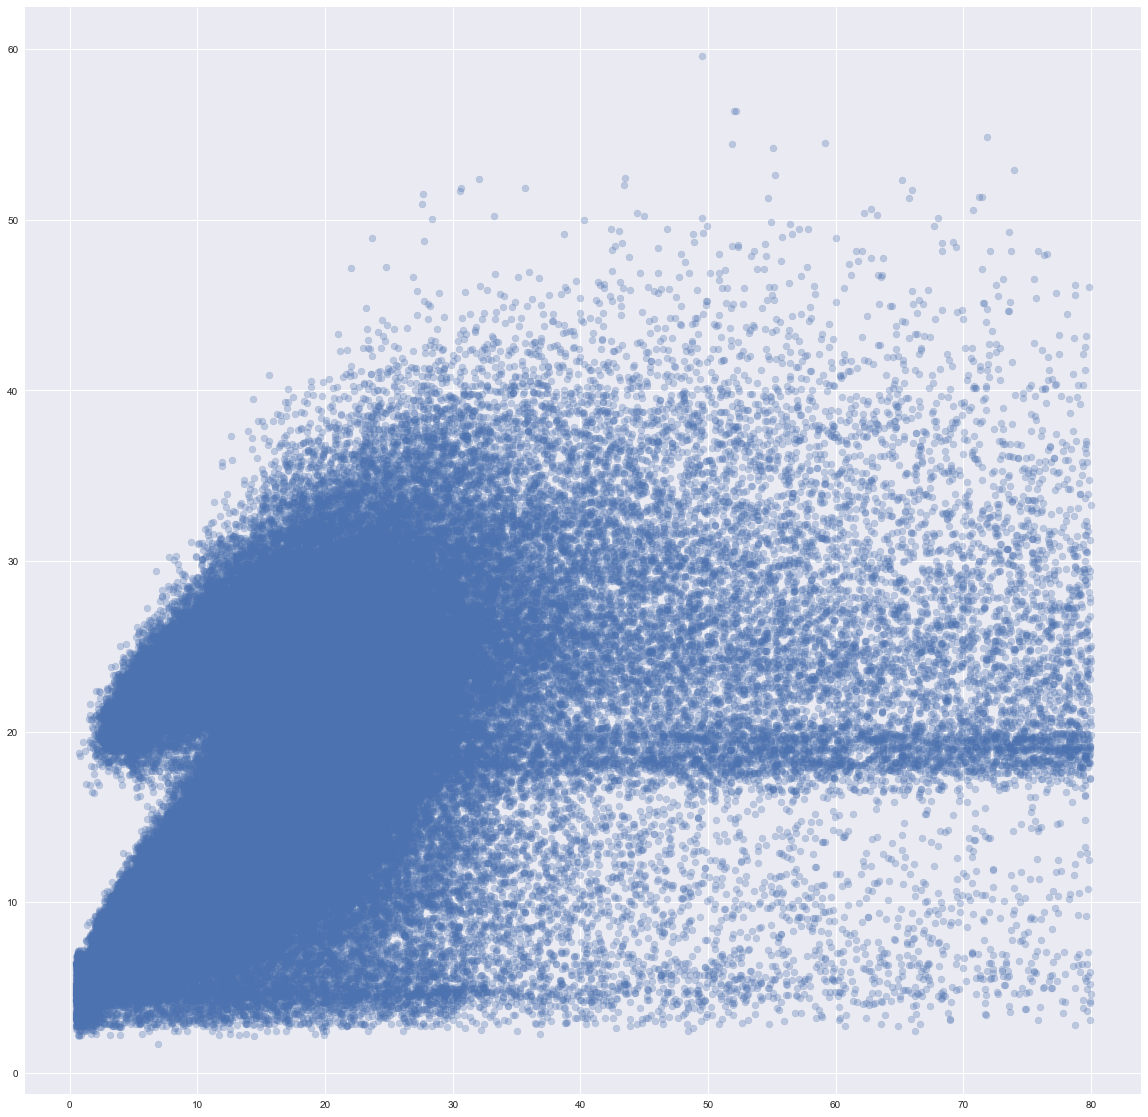

In [95]:
plt.figure(figsize=(20,20))
plt.scatter(y_test, model_1_pred, alpha=0.3)

In [96]:
model_1.coef_

array([  3.75390914e+00,  -4.87555940e-01,  -1.72158882e+00,
         6.34094731e+00,  -1.34357142e+01,   1.48126547e-01,
         2.14924116e-01,  -2.76517654e-02,  -4.24432370e-02,
         5.61118937e-01,   1.22924570e+00,   8.19546253e-01,
        -2.40331652e-01,  -6.41230163e-01,  -3.79158532e-01,
        -2.88246189e-01,   1.84693224e-01,   2.11001012e-01,
        -1.94282410e-01,   1.31187639e+11,  -1.31187639e+11,
        -1.31187639e+11,  -1.31187639e+11,  -1.31187639e+11,
        -1.31187639e+11,   1.88958748e-01,   1.31187639e+11,
        -3.24725314e-01,  -8.99078272e-01])

# Model 2

In [97]:
columns = ['temp', 'humidity','windspeed', 'miles', 'registered', 'summer',
       'fall', 'winter', 'feb', 'march', 'april', 'may', 'june', 'july',
       'august', 'sept', 'oct', 'nov', 'dec', 'holiday',
       'work_day', 'cloudy', 'rainy']
X = bikeshare_dummy[columns]
y = bikeshare_dummy['time_diff']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=17)

In [105]:
model_2 = LinearRegression()
model_2.fit(X_train, y_train)
model_2_pred = model_2.predict(X_test)
model_2_test_score = model_2.score(X_test, y_test)
model_2_mse = mean_squared_error(y_test, model_2_pred)
model_2_rmse = np.sqrt(model_2_mse)
model_2_evar = explained_variance_score(y_test, model_2_pred)
adjusted_r_2 = 1 - (1-model_2_test_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

cvscores_10_model_2 = cross_val_score(model_2, X_train, y_train, cv=10)

In [106]:
print(model_2_test_score)
print(model_2_mse)
print(model_2_rmse)
print(model_2_evar)
print(adjusted_r_2)
print(cvscores_10_model_2)

0.369857398024
86.5010877998
9.30059609916
0.369862615661
0.369923026754
[ 0.37990149  0.37587058  0.37509054  0.36817848  0.37771103  0.36983249
  0.37457413  0.37401705  0.36997869  0.37680813]


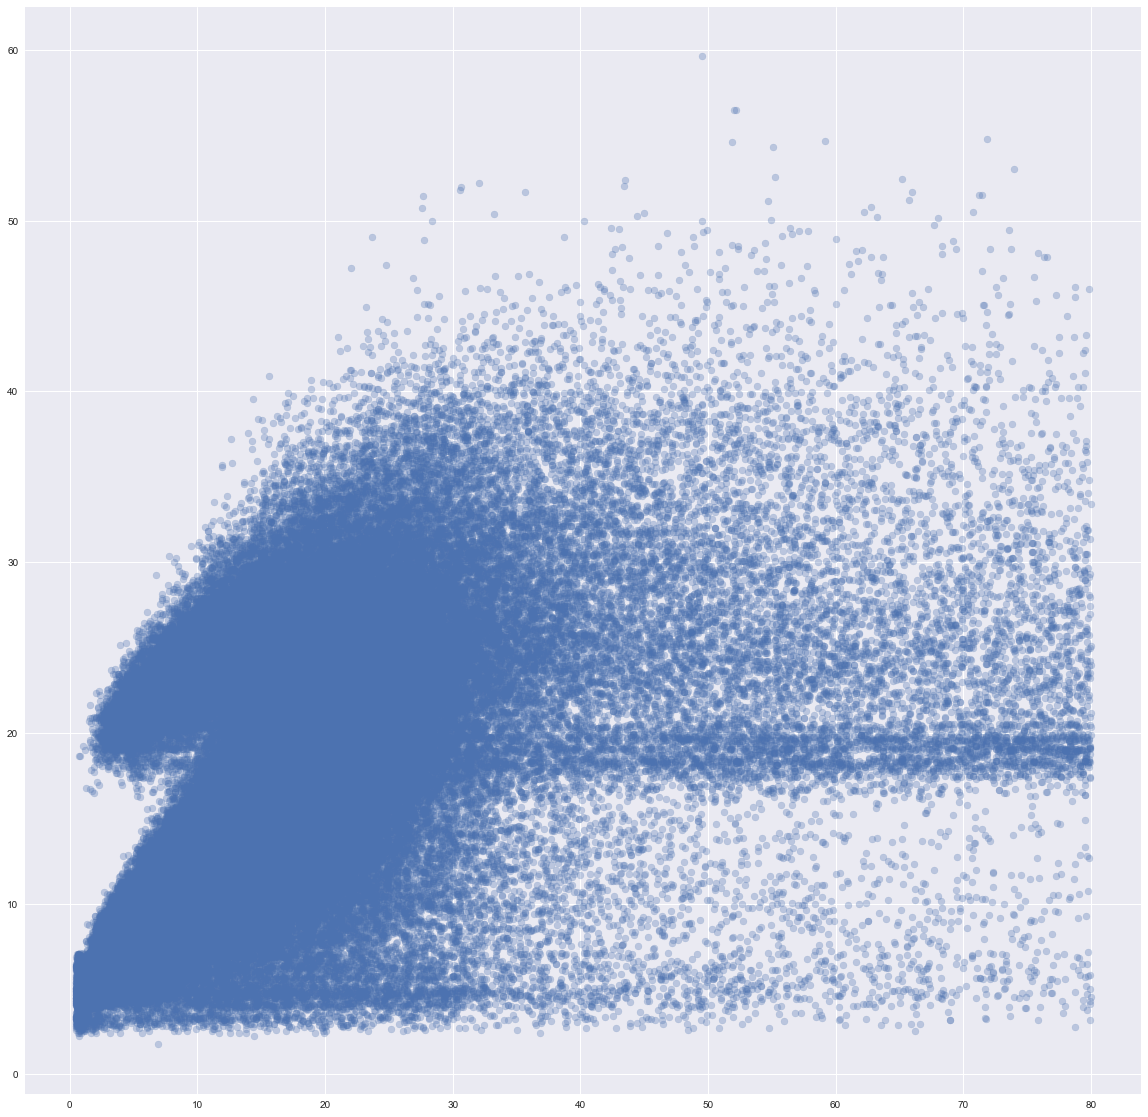

In [107]:
plt.figure(figsize=(20,20))
plt.scatter(y_test, model_2_pred, alpha=0.3)

# Model 3

In [132]:
columns = ['temp', 'humidity','windspeed', 'miles', 'registered', 'summer',
       'fall', 'winter', 'feb', 'march', 'april', 'may', 'june', 'july',
       'august', 'sept', 'oct', 'nov', 'dec', 'holiday',
       'mon', 'tues', 'wed', 'thurs', 'fri',
       'sat', 'work_day', 'cloudy', 'rainy']
X = bikeshare_dummy[columns]
y = bikeshare_dummy['time_diff']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=17)

In [137]:
lasso_1 = LassoCV(cv=10, fit_intercept=True)
lasso_1.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [146]:
lasso_1_coef = lasso_1.coef_
print(lasso_1_coef)

[  3.18688965e+00  -0.00000000e+00  -7.69963146e-01   6.33733599e+00
  -1.34321851e+01   1.74693377e-01   4.77458431e-03   0.00000000e+00
  -3.97448816e-02   5.39677988e-01   1.13810313e+00   8.25393671e-01
   0.00000000e+00  -1.60075572e-01   0.00000000e+00  -0.00000000e+00
   1.47639723e-01   1.09089815e-01  -1.67581249e-01  -1.72879054e-01
  -0.00000000e+00  -2.15510391e-01  -2.66392777e-01  -1.67301530e-01
   7.68259082e-03   1.96946353e-01  -1.26698643e+00  -3.72221348e-01
  -8.48987766e-01]


In [140]:
lasso_1.alpha_

0.0035647349175388144

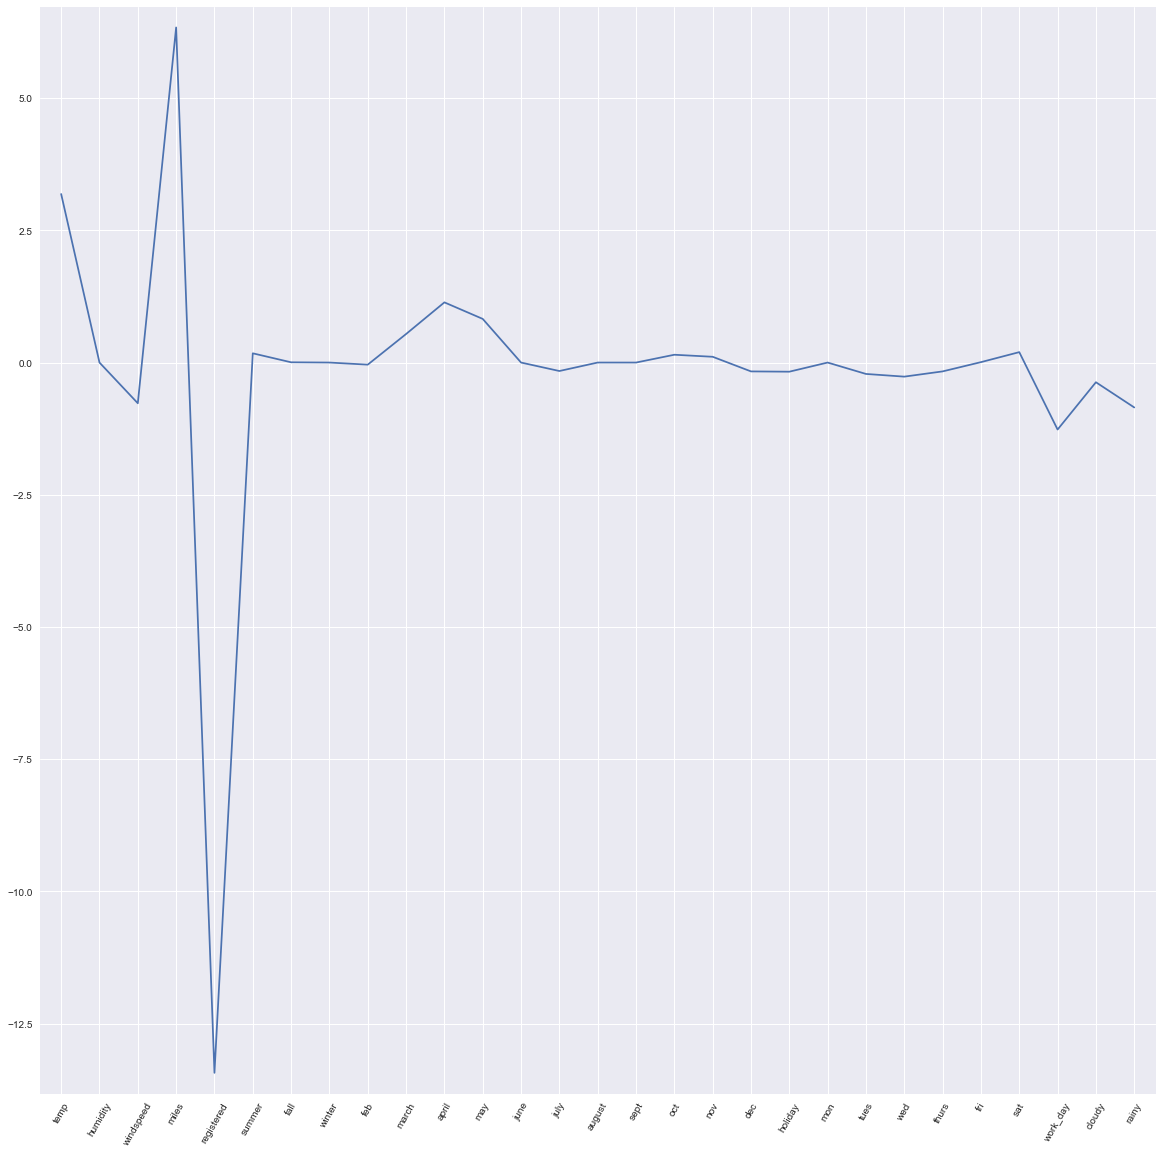

In [145]:
plt.figure(figsize=(20,20))
plt.plot(range(len(columns)), lasso_1_coef)
plt.xticks(range(len(columns)), columns, rotation=60)
plt.margins(0.02)
plt.show()

In [143]:
lasso_1_pred = lasso_1.predict(X_test)
lasso_1_test_score = lasso_1.score(X_test, y_test)
lasso_1_mse = mean_squared_error(y_test, lasso_1_pred)
lasso_1_rmse = np.sqrt(lasso_1_mse)
lasso_1_evar = explained_variance_score(y_test, lasso_1_pred)
adjusted_r_l1 = 1 - (1-lasso_1_test_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [144]:
print(model_2_test_score)
print(model_2_mse)
print(model_2_rmse)
print(model_2_evar)
print(adjusted_r_2)

0.369857398024
86.5010877998
9.30059609916
0.369862615661
0.369923026754


In [154]:
df = pd.DataFrame({'col': columns, 'coef': lasso_1_coef})
small_df = df[df['coef'] != 0]
cols = list(small_df['col'])
cols

['temp',
 'windspeed',
 'miles',
 'registered',
 'summer',
 'fall',
 'feb',
 'march',
 'april',
 'may',
 'july',
 'oct',
 'nov',
 'dec',
 'holiday',
 'tues',
 'wed',
 'thurs',
 'fri',
 'sat',
 'work_day',
 'cloudy',
 'rainy']

# Model 4

In [168]:
X = bikeshare_dummy[cols]
y = bikeshare_dummy['time_diff']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=17)

In [170]:
model_4 = LinearRegression()
model_4.fit(X_train, y_train)
model_4_pred = model_4.predict(X_test)
model_4_test_score = model_4.score(X_test, y_test)
model_4_mse = mean_squared_error(y_test, model_4_pred)
model_4_rmse = np.sqrt(model_4_mse)
model_4_evar = explained_variance_score(y_test, model_4_pred)
adjusted_r_4 = 1 - (1-model_4_test_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

cvscores_10_model_4 = cross_val_score(model_4, X_train, y_train, cv=10)

In [171]:
print(model_4_test_score)
print(model_4_mse)
print(model_4_rmse)
print(model_4_evar)
print(adjusted_r_4)
print(cvscores_10_model_4)

0.36993215593
86.4908256144
9.30004438777
0.369937421687
0.369884632957
[ 0.38004871  0.37593819  0.3752287   0.36821153  0.3778131   0.36993097
  0.37459218  0.37405352  0.36999924  0.37696738]


# Model 5

In [161]:
columns = ['temp', 'humidity','windspeed', 'miles', 'registered', 'summer',
       'fall', 'winter', 'feb', 'march', 'april', 'may', 'june', 'july',
       'august', 'sept', 'oct', 'nov', 'dec', 'holiday',
       'mon', 'tues', 'wed', 'thurs', 'fri',
       'sat', 'work_day', 'cloudy', 'rainy']
X = bikeshare_dummy[columns]
y = bikeshare_dummy['time_diff']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=17)

In [163]:
ridge_1 = RidgeCV(cv=10, fit_intercept=True)
ridge_1.fit(X_train, y_train)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=10, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [164]:
ridge_1_pred = ridge_1.predict(X_test)
ridge_1_test_score = ridge_1.score(X_test, y_test)
ridge_1_mse = mean_squared_error(y_test, ridge_1_pred)
ridge_1_rmse = np.sqrt(ridge_1_mse)
ridge_1_evar = explained_variance_score(y_test, ridge_1_pred)
adjusted_r_r1 = 1 - (1-ridge_1_test_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [165]:
print(ridge_1_test_score)
print(ridge_1_mse)
print(ridge_1_rmse)
print(ridge_1_evar)
print(adjusted_r_r1)

0.369970369801
86.4855799106
9.29976235775
0.369975647751
0.369910451986


# Model 6

In [167]:
columns = ['temp', 'humidity','windspeed', 'miles', 'registered']
X = bikeshare_dummy[columns]
y = bikeshare_dummy['time_diff']

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=17)

In [173]:
model_5 = LinearRegression()
model_5.fit(X_train, y_train)
model_5_pred = model_5.predict(X_test)
model_5_test_score = model_5.score(X_test, y_test)
model_5_mse = mean_squared_error(y_test, model_5_pred)
model_5_rmse = np.sqrt(model_5_mse)
model_5_evar = explained_variance_score(y_test, model_5_pred)
adjusted_r_5 = 1 - (1-model_5_test_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

cvscores_10_model_5 = cross_val_score(model_5, X_train, y_train, cv=10)

In [174]:
print(model_5_test_score)
print(model_5_mse)
print(model_5_rmse)
print(model_5_evar)
print(adjusted_r_5)
print(cvscores_10_model_5)

0.36993215593
86.4908256144
9.30004438777
0.369937421687
0.369884632957
[ 0.38004871  0.37593819  0.3752287   0.36821153  0.3778131   0.36993097
  0.37459218  0.37405352  0.36999924  0.37696738]


# Model 7

In [175]:
columns = ['miles', 'registered']
X = bikeshare_dummy[columns]
y = bikeshare_dummy['time_diff']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=17)

In [178]:
model_6 = LinearRegression()
model_6.fit(X_train, y_train)
model_6_pred = model_6.predict(X_test)
model_6_test_score = model_6.score(X_test, y_test)
model_6_mse = mean_squared_error(y_test, model_6_pred)
model_6_rmse = np.sqrt(model_6_mse)
model_6_evar = explained_variance_score(y_test, model_6_pred)
adjusted_r_6 = 1 - (1-model_6_test_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

cvscores_10_model_6 = cross_val_score(model_6, X_train, y_train, cv=10)

In [179]:
print(model_6_test_score)
print(model_6_mse)
print(model_6_rmse)
print(model_6_evar)
print(adjusted_r_6)
print(cvscores_10_model_6)

0.362684155054
87.4857749452
9.35338307487
0.362689245556
0.362679975372
[ 0.37228062  0.36923325  0.36762295  0.36101824  0.37066226  0.36176663
  0.36712133  0.36616555  0.36309698  0.36964759]


# Model 8

In [181]:
columns = ['miles']
X = bikeshare_dummy[columns]
y = bikeshare_dummy['time_diff']

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=17)

In [183]:
model_7 = LinearRegression()
model_7.fit(X_train, y_train)
model_7_pred = model_7.predict(X_test)
model_7_test_score = model_7.score(X_test, y_test)
model_7_mse = mean_squared_error(y_test, model_7_pred)
model_7_rmse = np.sqrt(model_7_mse)
model_7_evar = explained_variance_score(y_test, model_7_pred)
adjusted_r_7 = 1 - (1-model_7_test_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

cvscores_10_model_7 = cross_val_score(model_7, X_train, y_train, cv=10)

In [184]:
print(model_7_test_score)
print(model_7_mse)
print(model_7_rmse)
print(model_7_evar)
print(adjusted_r_7)
print(cvscores_10_model_7)

0.162470897682
114.969497678
10.7223830223
0.162479845956
0.162468151325
[ 0.16844695  0.16597513  0.16302766  0.16299969  0.16680622  0.16250039
  0.16985356  0.17001009  0.16707825  0.16735399]


# Model 9

In [185]:
columns = ['registered']
X = bikeshare_dummy[columns]
y = bikeshare_dummy['time_diff']

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=17)

In [187]:
model_8 = LinearRegression()
model_8.fit(X_train, y_train)
model_8_pred = model_8.predict(X_test)
model_8_test_score = model_8.score(X_test, y_test)
model_8_mse = mean_squared_error(y_test, model_8_pred)
model_8_rmse = np.sqrt(model_8_mse)
model_8_evar = explained_variance_score(y_test, model_8_pred)
adjusted_r_8 = 1 - (1-model_8_test_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

cvscores_10_model_8 = cross_val_score(model_8, X_train, y_train, cv=10)

In [188]:
print(model_8_test_score)
print(model_8_mse)
print(model_8_rmse)
print(model_8_evar)
print(adjusted_r_8)
print(cvscores_10_model_8)

0.202150291774
109.522618286
10.465305456
0.202156306474
0.20214767553
[ 0.20539197  0.20722863  0.20577846  0.1986341   0.20689434  0.20027675
  0.20241     0.19913658  0.1982474   0.20628073]
